In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from IPython import get_ipython
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('produccion-de-carne-bovina.csv', encoding='latin-1')

In [3]:
df.info()
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais_id                   2598 non-null   int64  
 1   pais                      2598 non-null   object 
 2   provincia_id              2598 non-null   int64  
 3   provincia                 2598 non-null   object 
 4   departamento_id           2598 non-null   int64  
 5   departamento              2598 non-null   object 
 6   prov_depto                2598 non-null   int64  
 7   año                       2598 non-null   int64  
 8   mes                       2598 non-null   int64  
 9   modelo                    2598 non-null   object 
 10  actividad                 2598 non-null   object 
 11  referencia                2598 non-null   object 
 12  margen_bruto_($/ha)       2598 non-null   int64  
 13  resultado_neto_($/ha)     2598 non-null   int64  
 14  ingreso_

<bound method DataFrame.info of       pais_id       pais  provincia_id            provincia  departamento_id  \
0          32  Argentina             6         Buenos Aires              105   
1          32  Argentina             6         Buenos Aires              231   
2          32  Argentina             6         Buenos Aires              203   
3          32  Argentina            14              Cordoba               42   
4          32  Argentina            14              Cordoba               56   
...       ...        ...           ...                  ...              ...   
2593       32  Argentina            86  Santiago Del Estero              168   
2594       32  Argentina            86  Santiago Del Estero              175   
2595       32  Argentina            86  Santiago Del Estero              182   
2596       32  Argentina            86  Santiago Del Estero              189   
2597       32  Argentina             6         Buenos Aires              466   

       

In [4]:
df.head()

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,...,ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Unnamed: 21,Unnamed: 22,Unnamed: 23
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,...,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,...,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,...,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,...,4589,2544,1909,36,157,65,436,NaN,NaN,NaN
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,...,4589,2544,1909,36,157,65,436,NaN,NaN,NaN


In [5]:
df.isnull().sum()

pais_id                        0
pais                           0
provincia_id                   0
provincia                      0
departamento_id                0
departamento                   0
prov_depto                     0
año                            0
mes                            0
modelo                         0
actividad                      0
referencia                     0
margen_bruto_($/ha)            0
resultado_neto_($/ha)          0
ingreso_neto_($/ha)            0
gastos_directos_($/ha)         0
costos_indirectos_($/ha)       0
eficiencia_stock_(%)           0
producción_(kg/ha)             0
destete_(%)                    0
carga_(kg/ha)                  0
Unnamed: 21                 2598
Unnamed: 22                 2598
Unnamed: 23                 2557
dtype: int64

In [6]:
#Eliminar columnas con nan
#df =df.dropna()
#Elimino las columnas con nan

df1=df.drop(columns = ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']) 
#chequeo de todos los valores nan elimnados

df1.isnull().sum()


pais_id                     0
pais                        0
provincia_id                0
provincia                   0
departamento_id             0
departamento                0
prov_depto                  0
año                         0
mes                         0
modelo                      0
actividad                   0
referencia                  0
margen_bruto_($/ha)         0
resultado_neto_($/ha)       0
ingreso_neto_($/ha)         0
gastos_directos_($/ha)      0
costos_indirectos_($/ha)    0
eficiencia_stock_(%)        0
producción_(kg/ha)          0
destete_(%)                 0
carga_(kg/ha)               0
dtype: int64

In [7]:
df1.head()

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,...,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,...,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436


In [8]:
df1=df1.set_index('provincia')
df1.head()

,pais_id,pais,provincia_id,departamento_id,departamento,prov_depto,año,mes,modelo,actividad,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
provincia,,,,,,,,,,,,,,,,,,,,
Buenos Aires,32,Argentina,6,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
Buenos Aires,32,Argentina,6,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
Buenos Aires,32,Argentina,6,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bo...,1766,-31,3497,1730,1797,35,117,69,336
Cordoba,32,Argentina,14,42,General San Martin,14042,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436
Cordoba,32,Argentina,14,56,Juarez Celman,14056,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bo...,2045,136,4589,2544,1909,36,157,65,436


In [9]:
#raw_data=["Coarse wool Price","Copra Price","Cotton Price","Cotton price % Change","Fine wool Price","Hard log Price","Hard sawnwood Price","Hide Price","Plywood Price","Rubber Price","Softlog Price","Soft sawnwood Price","Soft sawnwood Price","Wood pulp Price"]

#matrix de correlacion

#corrmat=df[raw_data].corr()
#fig=plt.figure(figsize=(12,9))

#mascara
#mask=np.triu(np.ones_like(corrmat, dtype=bool))
#sns.heatmap(corrmat, vmax=.8, mask=mask,square=True, annot=True)
#plt.show()

print(df1.index)

df1.index.unique()

Index(['Buenos Aires', 'Buenos Aires', 'Buenos Aires', 'Cordoba', 'Cordoba',
       'Cordoba', 'Cordoba', 'Cordoba', 'Cordoba', 'Cordoba',
       ...
       'Santiago Del Estero', 'Santiago Del Estero', 'Santiago Del Estero',
       'Santiago Del Estero', 'Santiago Del Estero', 'Santiago Del Estero',
       'Santiago Del Estero', 'Santiago Del Estero', 'Santiago Del Estero',
       'Buenos Aires'],
      dtype='object', name='provincia', length=2598)


Index(['Buenos Aires', 'Cordoba', 'Chaco', 'Formosa', 'Corrientes', 'Santa Fe',
       'Entre Rios', 'La Pampa', 'San Luis', 'Salta', 'Santiago Del Estero',
       'Chubut', 'Rio Negro'],
      dtype='object', name='provincia')

In [10]:
df1.index.value_counts()

provincia
Buenos Aires           588
Cordoba                312
Chaco                  300
Santiago Del Estero    264
La Pampa               240
Entre Rios             204
Corrientes             190
Salta                  144
Santa Fe               132
San Luis               108
Formosa                 96
Chubut                  12
Rio Negro                8
Name: count, dtype: int64

In [11]:
df1['departamento'].value_counts()

departamento
Capital          60
Belgrano         36
San Martin       30
La Capital       24
Maipu            24
                 ..
Languineo         4
Tehuelches        4
Rio Senguer       4
Conesa            2
Pichi Mahuida     2
Name: count, Length: 199, dtype: int64

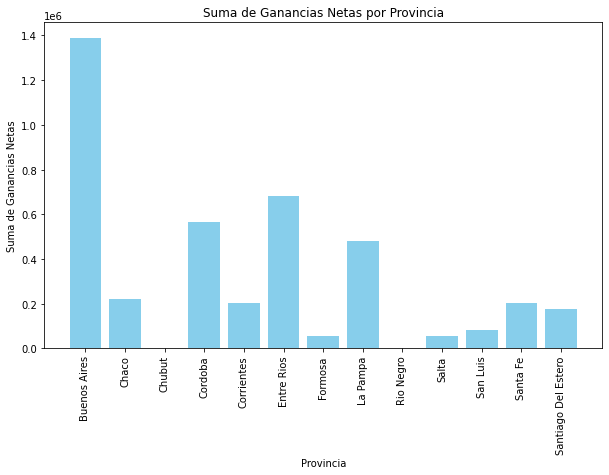

In [23]:
# Calcular la suma de ganancias netas por provincia
sum_ganancias = df.groupby('provincia')['ingreso_neto_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(sum_ganancias['provincia'], sum_ganancias['ingreso_neto_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Suma de Ganancias Netas')
plt.title('Suma de Ganancias Netas por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()

In [24]:
print(sum_ganancias)

              provincia  ingreso_neto_($/ha)
0          Buenos Aires              1389430
1                 Chaco               219611
2                Chubut                 2619
3               Cordoba               564437
4            Corrientes               204361
5            Entre Rios               683037
6               Formosa                55399
7              La Pampa               480101
8             Rio Negro                 2032
9                 Salta                55740
10             San Luis                83575
11             Santa Fe               202589
12  Santiago Del Estero               176349


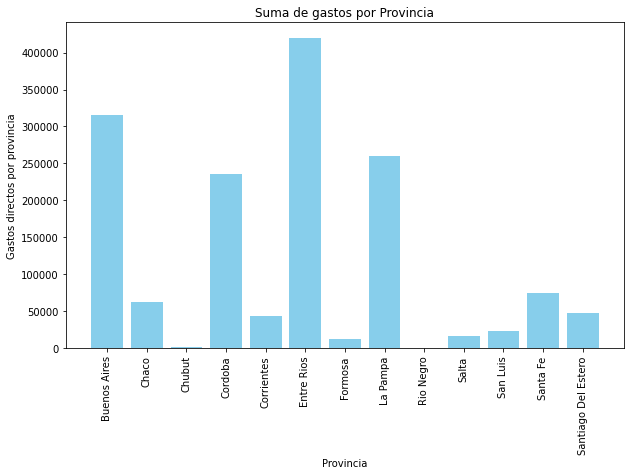

In [26]:
# Calcular los gastos directos por provincia
sum_gastos = df.groupby('provincia')['gastos_directos_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(sum_gastos['provincia'], sum_gastos['gastos_directos_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Gastos directos por provincia')
plt.title('Suma de gastos por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()

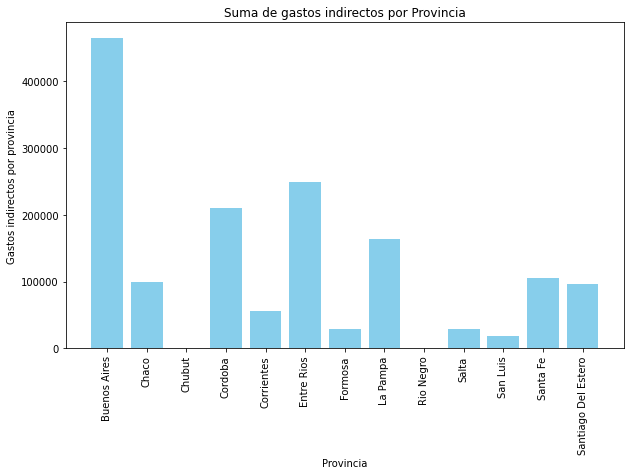

In [28]:
# Calcular los gastos indirectos por provincia
sum_gastos_indirectos = df.groupby('provincia')['costos_indirectos_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(sum_gastos_indirectos['provincia'], sum_gastos_indirectos['costos_indirectos_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Gastos indirectos por provincia')
plt.title('Suma de gastos indirectos por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()


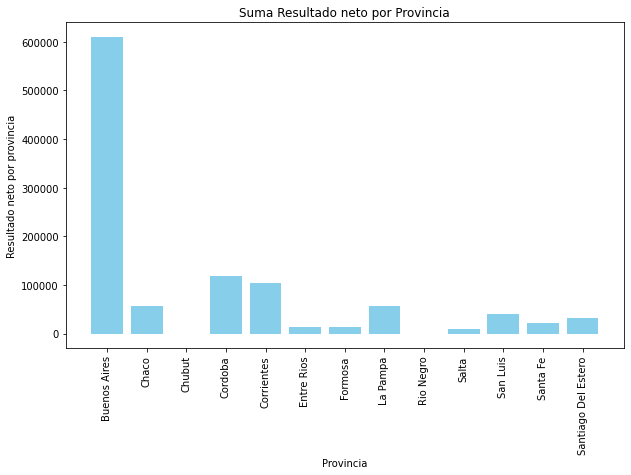

In [29]:
# Calcular resultado_neto por provincia
resultado_neto = df.groupby('provincia')['resultado_neto_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(resultado_neto['provincia'], resultado_neto['resultado_neto_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Resultado neto por provincia')
plt.title('Suma Resultado neto por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()

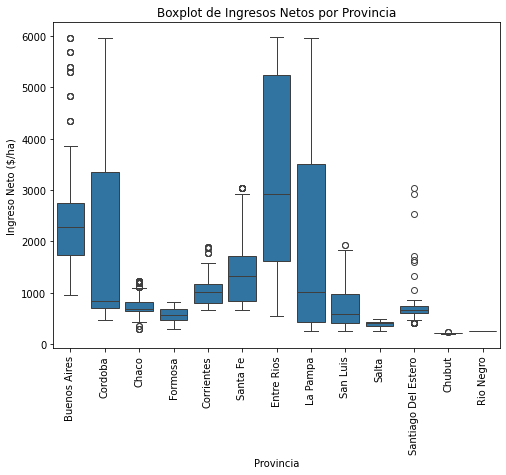

In [31]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='provincia', y='ingreso_neto_($/ha)', data=df)
plt.title('Boxplot de Ingresos Netos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Ingreso Neto ($/ha)')
plt.xticks(rotation ='vertical')
plt.show()

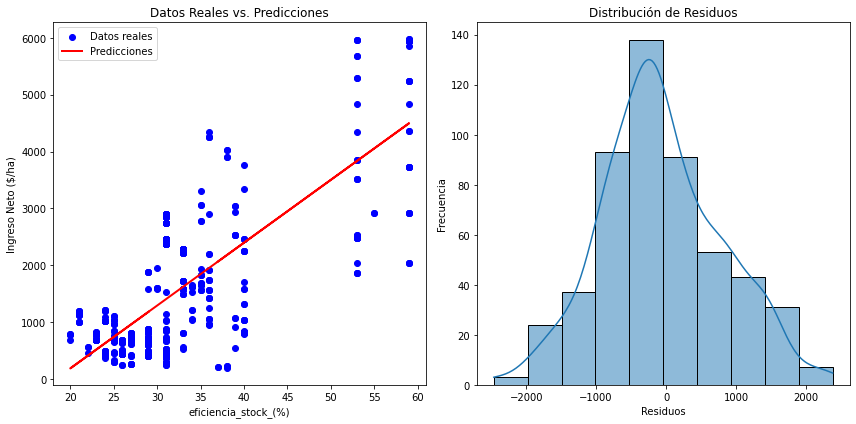


Métricas de rendimiento del modelo:
Mean Squared Error (MSE): 757538.29
R-squared (R2): 0.56


In [42]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['eficiencia_stock_(%)']]
y = df['ingreso_neto_($/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales y predichos
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Datos Reales vs. Predicciones')
plt.xlabel('eficiencia_stock_(%)')
plt.ylabel('Ingreso Neto ($/ha)')
plt.legend()

# Gráfico de residuos
residuos = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=10, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Imprimir métricas de rendimiento
print('\nMétricas de rendimiento del modelo:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

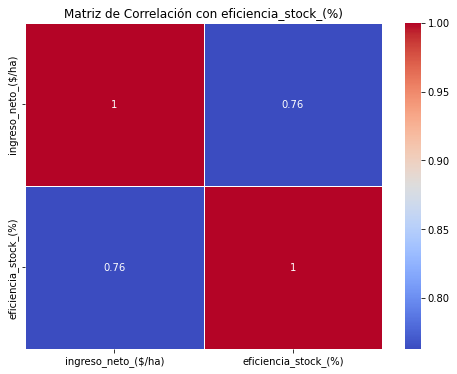

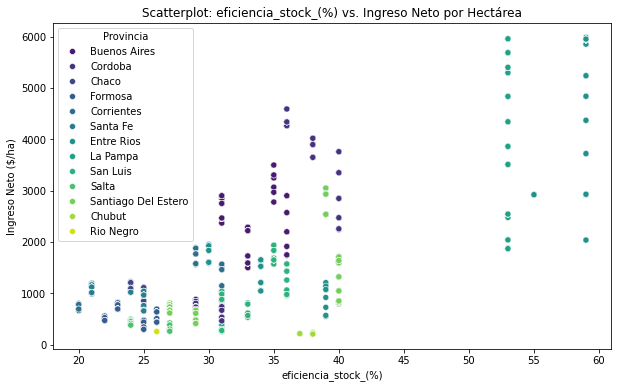

In [43]:
caracteristica_seleccionada = 'eficiencia_stock_(%)'

# Calcular la matriz de correlación solo con la característica seleccionada
correlation_matrix = df[['ingreso_neto_($/ha)', caracteristica_seleccionada]].corr()

# Visualizar la matriz de correlación usando un mapa de calor de Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Matriz de Correlación con {caracteristica_seleccionada}')
plt.show()

# Scatterplot para visualizar la relación entre las variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x=caracteristica_seleccionada, y='ingreso_neto_($/ha)', data=df, hue='provincia', palette='viridis')
plt.title(f'Scatterplot: {caracteristica_seleccionada} vs. Ingreso Neto por Hectárea')
plt.xlabel(caracteristica_seleccionada)
plt.ylabel('Ingreso Neto ($/ha)')
plt.legend(title='Provincia')
plt.show()

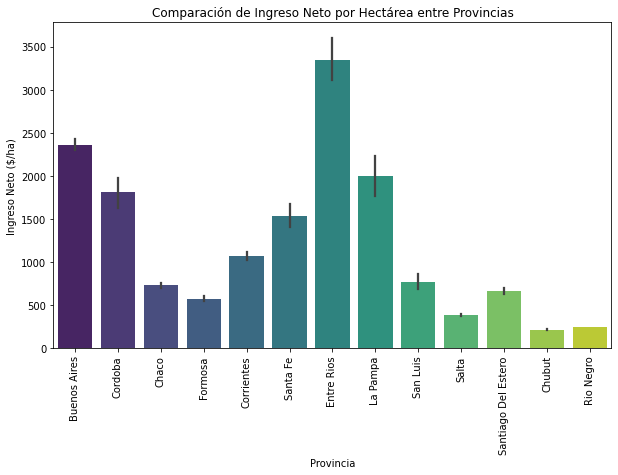

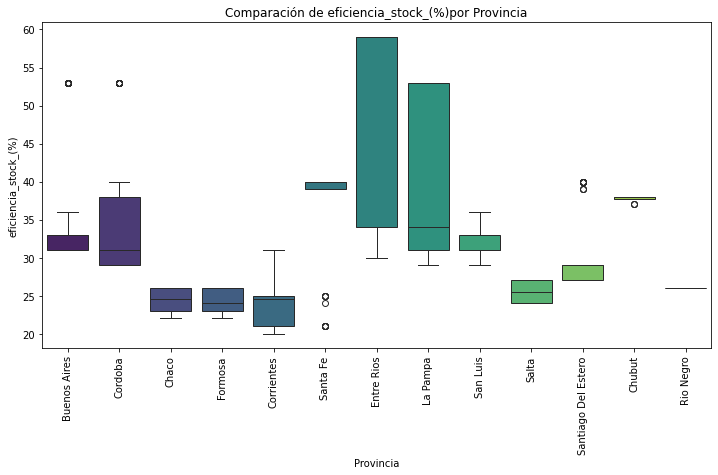

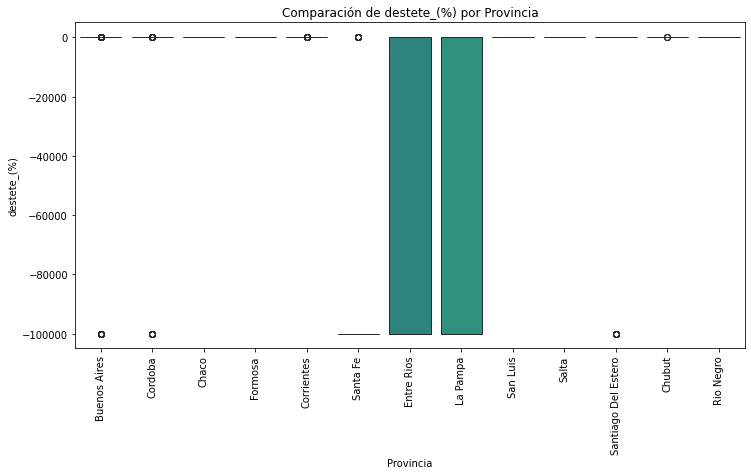

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y='ingreso_neto_($/ha)', data=df, hue='provincia', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de Ingreso Neto por Hectárea entre Provincias')
plt.xlabel('Provincia')
plt.ylabel('Ingreso Neto ($/ha)')
plt.xticks(rotation ='vertical')
plt.show()

# Boxplot para comparar otras características por provincia
plt.figure(figsize=(12, 6))
sns.boxplot(x='provincia', y='eficiencia_stock_(%)', data=df, hue='provincia', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de eficiencia_stock_(%)por Provincia')
plt.xlabel('Provincia')
plt.ylabel('eficiencia_stock_(%)')
plt.xticks(rotation ='vertical')
plt.show()

# Boxplot para otra característica (otra_caracteristica2)
plt.figure(figsize=(12, 6))
sns.boxplot(x='provincia', y='destete_(%)', data=df, hue='provincia', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de destete_(%) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('destete_(%)')
plt.xticks(rotation ='vertical')
plt.show()